In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_excel(r'C:\Users\syzha\Downloads\new3.7-OPS-PM Baseline Cost (Synthetic).xlsx')
df.head()

,Order Number,Change Request Title,Work Classification,Priority,Application Name,IT Directorate,IT Division,IT Section,Manager ID,Effort Cost,Capacity to Deliver,Actuals
0,161454,Sub-Project-1,Development,Low,Application A,DIR-1,Div-1,Sec-1,485317370,149149.421875,Yes,470545.583046
1,161454,Sub-Project-1,Development,Low,Application B,DIR-2,Div-2,Sec-2,485317562,35203.480469,Yes,8830.170000
2,161454,Sub-Project-1,Development,Low,Application C,DIR-1,Div-3,Sec-3,486437960,30286.000000,Yes,69890.006667
3,161454,Sub-Project-1,Development,Low,Application D,DIR-3,Div-4,Sec-4,484909766,34726.000000,Yes,13018.633333
4,161454,Sub-Project-1,Development,Low,Application E,DIR-4,Div-5,Sec-5,485093174,0.000000,No,0.000000


In [3]:
df.shape

(64, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Number          64 non-null     int64  
 1   Change Request Title  64 non-null     object 
 2   Work Classification   64 non-null     object 
 3   Priority              64 non-null     object 
 4   Application Name      64 non-null     object 
 5   IT Directorate        64 non-null     object 
 6   IT Division           64 non-null     object 
 7   IT Section            64 non-null     object 
 8   Manager ID            64 non-null     int64  
 9   Effort Cost           64 non-null     float64
 10  Capacity to Deliver   64 non-null     object 
 11  Actuals               64 non-null     float64
dtypes: float64(2), int64(2), object(8)
memory usage: 6.1+ KB


In [5]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60     True
61    False
62    False
63    False
Length: 64, dtype: bool

In [8]:
df.drop_duplicates(inplace=True)


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode each categorical column separately and assign to new columns
df['Order Number_LabelEncoded']= le.fit_transform(df['Order Number '])
df['Change Request Title_LabelEncoded'] = le.fit_transform(df['Change Request Title'])
df['Work Classification_LabelEncoded'] = le.fit_transform(df['Work Classification'])
df['Priority_LabelEncoded'] = le.fit_transform(df['Priority'])
df['Application Name_LabelEncoded'] = le.fit_transform(df['Application Name'])
df['IT Directorate_LabelEncoded']= le.fit_transform(df['IT Directorate'])
df['IT Division_LabelEncoded']= le.fit_transform(df['IT Division'])
df['IT Section_LabelEncoded']= le.fit_transform(df['IT Section'])
df['Manager ID_LabelEncoded']= le.fit_transform(df['Manager ID'])

df['Capacity to Deliver_LabelEncoded']=le.fit_transform(df['Capacity to Deliver'])

df_en=df[['Order Number_LabelEncoded','Change Request Title_LabelEncoded', 'Work Classification_LabelEncoded','Priority_LabelEncoded','Application Name_LabelEncoded','IT Directorate_LabelEncoded','IT Division_LabelEncoded','IT Section_LabelEncoded','Manager ID_LabelEncoded','Effort Cost','Capacity to Deliver_LabelEncoded','Actuals']]

# Display the encoded values for the first 5 rows
#print(df_le)
df_en.head(20)
#print(df[['Change Request Title_LabelEncoded', 'Work Classification_LabelEncoded','Priority_LabelEncoded','Application Name_LabelEncoded','IT Directorate_LabelEncoded','IT Division_LabelEncoded','Manager ID_LabelEncoded']].head())



,Order Number_LabelEncoded,Change Request Title_LabelEncoded,Work Classification_LabelEncoded,Priority_LabelEncoded,Application Name_LabelEncoded,IT Directorate_LabelEncoded,IT Division_LabelEncoded,IT Section_LabelEncoded,Manager ID_LabelEncoded,Effort Cost,Capacity to Deliver_LabelEncoded,Actuals
0,12,0,0,2,0,0,0,0,16,149149.421875,1,470545.583046
1,12,0,0,2,1,1,6,11,18,35203.480469,1,8830.170000
2,12,0,0,2,2,0,7,22,23,30286.000000,1,69890.006667
3,12,0,0,2,3,2,8,25,6,34726.000000,1,13018.633333
4,12,0,0,2,4,3,9,26,9,0.000000,0,0.000000
5,12,0,0,2,0,0,0,27,17,30544.000000,1,14789.150594
6,12,0,0,2,5,0,10,28,4,39062.379883,1,51832.860000
7,12,0,0,2,6,0,10,29,1,94317.500000,1,150693.837598
8,12,0,0,2,7,0,0,30,3,49126.000000,1,74047.011038
9,12,0,0,2,8,0,7,1,24,35262.000000,1,67243.407395


In [10]:
df_en.corr()

,Order Number_LabelEncoded,Change Request Title_LabelEncoded,Work Classification_LabelEncoded,Priority_LabelEncoded,Application Name_LabelEncoded,IT Directorate_LabelEncoded,IT Division_LabelEncoded,IT Section_LabelEncoded,Manager ID_LabelEncoded,Effort Cost,Capacity to Deliver_LabelEncoded,Actuals
Order Number_LabelEncoded,1.000000,-0.084834,-0.226232,-0.179419,-0.474748,-0.213915,0.095545,0.002321,0.025986,-0.165312,-0.160602,-0.128581
Change Request Title_LabelEncoded,-0.084834,1.000000,0.126640,-0.058351,-0.180640,-0.024796,0.163137,-0.205220,-0.105951,-0.159001,-0.266731,-0.227415
Work Classification_LabelEncoded,-0.226232,0.126640,1.000000,0.218432,0.269883,0.226848,0.174304,-0.090894,0.075324,-0.165705,-0.034669,-0.104923
Priority_LabelEncoded,-0.179419,-0.058351,0.218432,1.000000,0.098431,0.110365,0.200941,-0.199385,0.121700,-0.199037,0.053524,-0.180322
Application Name_LabelEncoded,-0.474748,-0.180640,0.269883,0.098431,1.000000,0.494507,0.108249,0.023915,0.107019,0.175466,0.048147,0.121459
IT Directorate_LabelEncoded,-0.213915,-0.024796,0.226848,0.110365,0.494507,1.000000,0.060903,0.045065,0.121327,0.155569,-0.324760,0.050625
IT Division_LabelEncoded,0.095545,0.163137,0.174304,0.200941,0.108249,0.060903,1.000000,-0.305014,-0.207773,-0.208573,-0.169373,-0.199504
IT Section_LabelEncoded,0.002321,-0.205220,-0.090894,-0.199385,0.023915,0.045065,-0.305014,1.000000,-0.172067,-0.036006,-0.140057,-0.155292
Manager ID_LabelEncoded,0.025986,-0.105951,0.075324,0.121700,0.107019,0.121327,-0.207773,-0.172067,1.000000,0.182915,0.262192,0.156801
Effort Cost,-0.165312,-0.159001,-0.165705,-0.199037,0.175466,0.155569,-0.208573,-0.036006,0.182915,1.000000,0.162158,0.646705


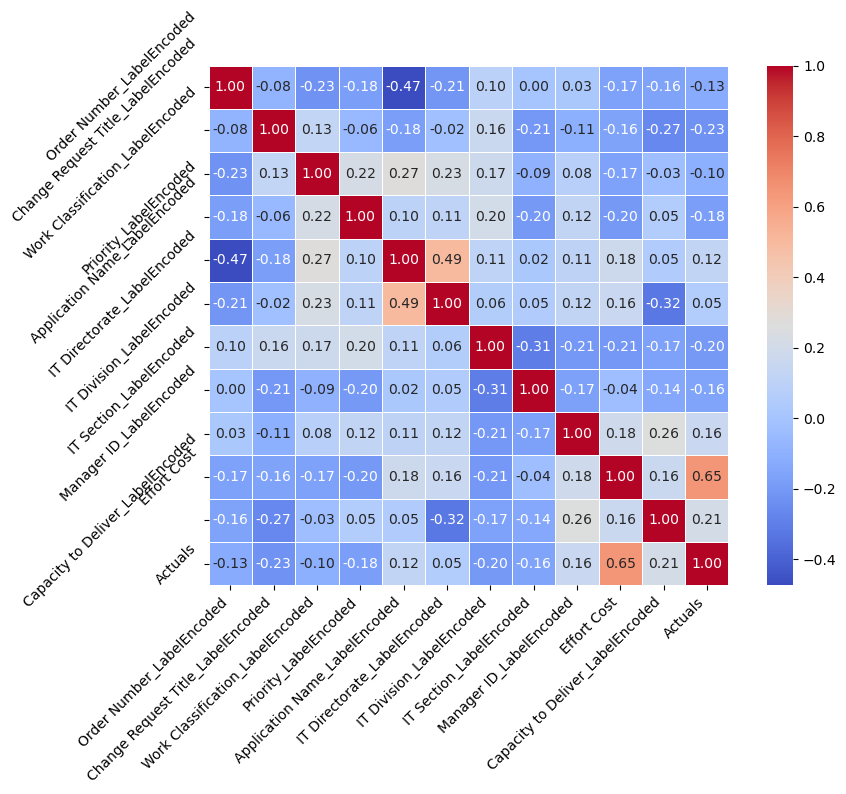

In [11]:
corr_matrix = df_en.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size (optional)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)

# Optional: Adjust the layout
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

In [12]:
# seperate input features in x
x = df_en.drop(['Order Number_LabelEncoded','Capacity to Deliver_LabelEncoded','Actuals'], axis=1)

# store the target variable in y
y= df_en['Capacity to Deliver_LabelEncoded']

In [13]:
x

,Change Request Title_LabelEncoded,Work Classification_LabelEncoded,Priority_LabelEncoded,Application Name_LabelEncoded,IT Directorate_LabelEncoded,IT Division_LabelEncoded,IT Section_LabelEncoded,Manager ID_LabelEncoded,Effort Cost
0,0,0,2,0,0,0,0,16,149149.421875
1,0,0,2,1,1,6,11,18,35203.480469
2,0,0,2,2,0,7,22,23,30286.000000
3,0,0,2,3,2,8,25,6,34726.000000
4,0,0,2,4,3,9,26,9,0.000000
...,...,...,...,...,...,...,...,...,...
58,3,1,3,1,1,6,20,18,35326.299805
59,3,1,3,23,5,5,21,20,29526.000000
61,3,1,3,24,5,5,23,21,34576.000000
62,4,0,3,25,1,12,24,19,36588.000000


In [14]:
y

0     1
1     1
2     1
3     1
4     0
     ..
58    1
59    1
61    1
62    1
63    1
Name: Capacity to Deliver_LabelEncoded, Length: 63, dtype: int32

In [15]:
value_counts = y.value_counts()
count_of_ones = value_counts.get(1, 0)
count_of_zeros = value_counts.get(0, 0)

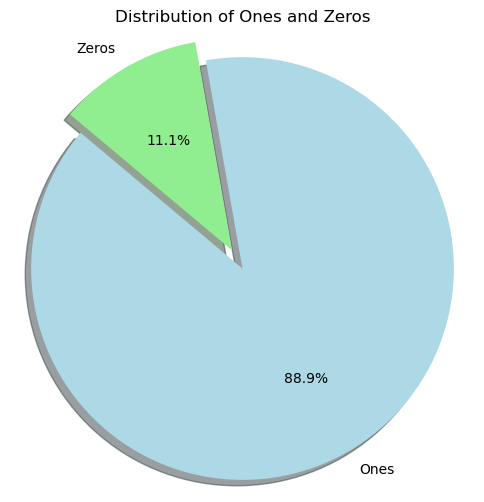

In [16]:
labels = ['Ones', 'Zeros']
sizes = [count_of_ones, count_of_zeros]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # Explode the first slice (Ones)

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Ones and Zeros')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [17]:
# import module
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split


# Split the datase
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=234)

In [18]:
x_train

,Change Request Title_LabelEncoded,Work Classification_LabelEncoded,Priority_LabelEncoded,Application Name_LabelEncoded,IT Directorate_LabelEncoded,IT Division_LabelEncoded,IT Section_LabelEncoded,Manager ID_LabelEncoded,Effort Cost
25,7,0,2,2,0,7,22,23,30286.000000
58,3,1,3,1,1,6,20,18,35326.299805
38,10,1,2,4,3,9,26,9,0.000000
18,6,0,3,1,1,6,11,18,35203.480469
5,0,0,2,0,0,0,27,17,30544.000000
24,7,0,2,0,0,0,0,16,29414.500000
61,3,1,3,24,5,5,23,21,34576.000000
20,7,0,2,0,0,0,27,17,26029.000000
47,1,1,3,15,4,13,12,25,29851.000000
46,12,0,2,11,3,9,6,8,0.000000


In [19]:
y_train

25    1
58    1
38    0
18    1
5     1
24    1
61    1
20    1
47    1
46    0
9     1
27    1
50    1
13    1
35    1
15    1
53    1
23    1
37    1
43    1
52    1
0     1
32    1
36    1
7     1
21    0
55    1
19    1
28    1
26    1
63    1
34    1
56    1
48    1
51    1
54    1
39    1
3     1
33    1
62    1
57    1
4     0
31    1
8     1
Name: Capacity to Deliver_LabelEncoded, dtype: int32

In [20]:
x_test

,Change Request Title_LabelEncoded,Work Classification_LabelEncoded,Priority_LabelEncoded,Application Name_LabelEncoded,IT Directorate_LabelEncoded,IT Division_LabelEncoded,IT Section_LabelEncoded,Manager ID_LabelEncoded,Effort Cost
30,8,0,3,3,2,8,7,5,50366.939453
42,10,1,2,2,0,7,22,23,30286.000000
6,0,0,2,5,0,10,28,4,39062.379883
17,6,0,3,7,1,11,2,13,55303.000000
1,0,0,2,1,1,6,11,18,35203.480469
12,5,1,3,3,2,8,3,6,35762.000000
45,12,0,2,7,1,11,2,13,44956.599609
2,0,0,2,2,0,7,22,23,30286.000000
11,5,1,3,1,1,6,11,18,35203.480469
14,5,1,3,9,1,12,5,0,31742.000000


In [21]:
y_test

30    1
42    1
6     1
17    1
1     1
12    1
45    1
2     1
11    1
14    0
10    1
40    1
41    0
44    0
16    1
49    1
22    1
59    1
29    1
Name: Capacity to Deliver_LabelEncoded, dtype: int32

In [22]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((44, 9), (44,), (19, 9), (19,))

In [23]:
# create an instance of the model
rf = RandomForestClassifier(n_estimators=200, criterion='gini')

In [24]:
rfmodel = rf.fit(x_train,y_train)

In [25]:
# make prediction on train set
ytrain_pred = rfmodel.predict(x_train)

In [26]:
ytrain_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [27]:
# make predictions on the x_test values
ytest_pred = rfmodel.predict(x_test)
ytest_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [28]:
from sklearn.metrics import accuracy_score

# Compute accuracy for training set
train_accuracy = accuracy_score(y_train, ytrain_pred)
print("Training Accuracy:", train_accuracy)

# Compute accuracy for testing set
test_accuracy = accuracy_score(y_test, ytest_pred)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.8947368421052632


In [29]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for training set
confusion_matrix_train = confusion_matrix(y_train, ytrain_pred)
print("Confusion Matrix (Training Set):")
print(confusion_matrix_train)

# Compute the confusion matrix for testing set
confusion_matrix_test = confusion_matrix(y_test, ytest_pred)
print("\nConfusion Matrix (Testing Set):")
print(confusion_matrix_test)


Confusion Matrix (Training Set):
[[ 4  0]
 [ 0 40]]

Confusion Matrix (Testing Set):
[[ 1  2]
 [ 0 16]]


In [30]:
from sklearn.metrics import classification_report

# Compute classification report for training set
print("Classification Report (Training Set):")
print(classification_report(y_train, ytrain_pred))

# Compute classification report for testing set
print("\nClassification Report (Testing Set):")
print(classification_report(y_test, ytest_pred))


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        40

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44


Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.89      1.00      0.94        16

    accuracy                           0.89        19
   macro avg       0.94      0.67      0.72        19
weighted avg       0.91      0.89      0.87        19



In [31]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform k-fold cross-validation
k = 4  # Number of folds
scores = cross_val_score(rf, x, y, cv=k)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print(f"Mean accuracy: {np.mean(scores):.2f}")

Cross-validation scores: [0.9375     1.         0.9375     0.93333333]
Mean accuracy: 0.95


In [32]:
accuracy_scores = cross_val_score(rf, x, y, cv=k, scoring='accuracy')
precision_scores = cross_val_score(rf, x, y, cv=k, scoring='precision')
recall_scores = cross_val_score(rf, x, y, cv=k, scoring='recall')
f1_scores = cross_val_score(rf, x, y, cv=k, scoring='f1')

print(f'Mean Accuracy: {np.mean(accuracy_scores):.2f}')
print(f'Mean Precision: {np.mean(precision_scores):.2f}')
print(f'Mean Recall: {np.mean(recall_scores):.2f}')
print(f'Mean F1-score: {np.mean(f1_scores):.2f}')

Mean Accuracy: 0.95
Mean Precision: 0.97
Mean Recall: 0.98
Mean F1-score: 0.97
